In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df= pd.read_csv("water.csv")
# Display the first few rows of the DataFrame
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [3]:
# Display the last few rows of the DataFrame
df.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [4]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
df.shape

(3276, 10)

In [7]:
# Check for missing values in the DataFrame
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [9]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [10]:
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [11]:
df_copy = df.copy()

In [12]:
df_copy.shape

(3276, 10)

In [13]:
# List of columns with missing values to be filled
miss_values = ["ph", "Sulfate", "Trihalomethanes"]

# Convert columns to float and fill missing values with median
for i in miss_values:
    df[i] = df[i].astype(float)
    df[i].fillna(df[i].median(), inplace=True)

In [14]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [15]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.074194   196.369496  22014.092526     7.122277   333.608364   
std       1.470040    32.879761   8768.570828     1.583085    36.143851   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.407478     3.966786     0.390110  
std       80.824064        3.308162        15.769958     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.647656     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        76.666609     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [16]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('cleaned_data.csv')

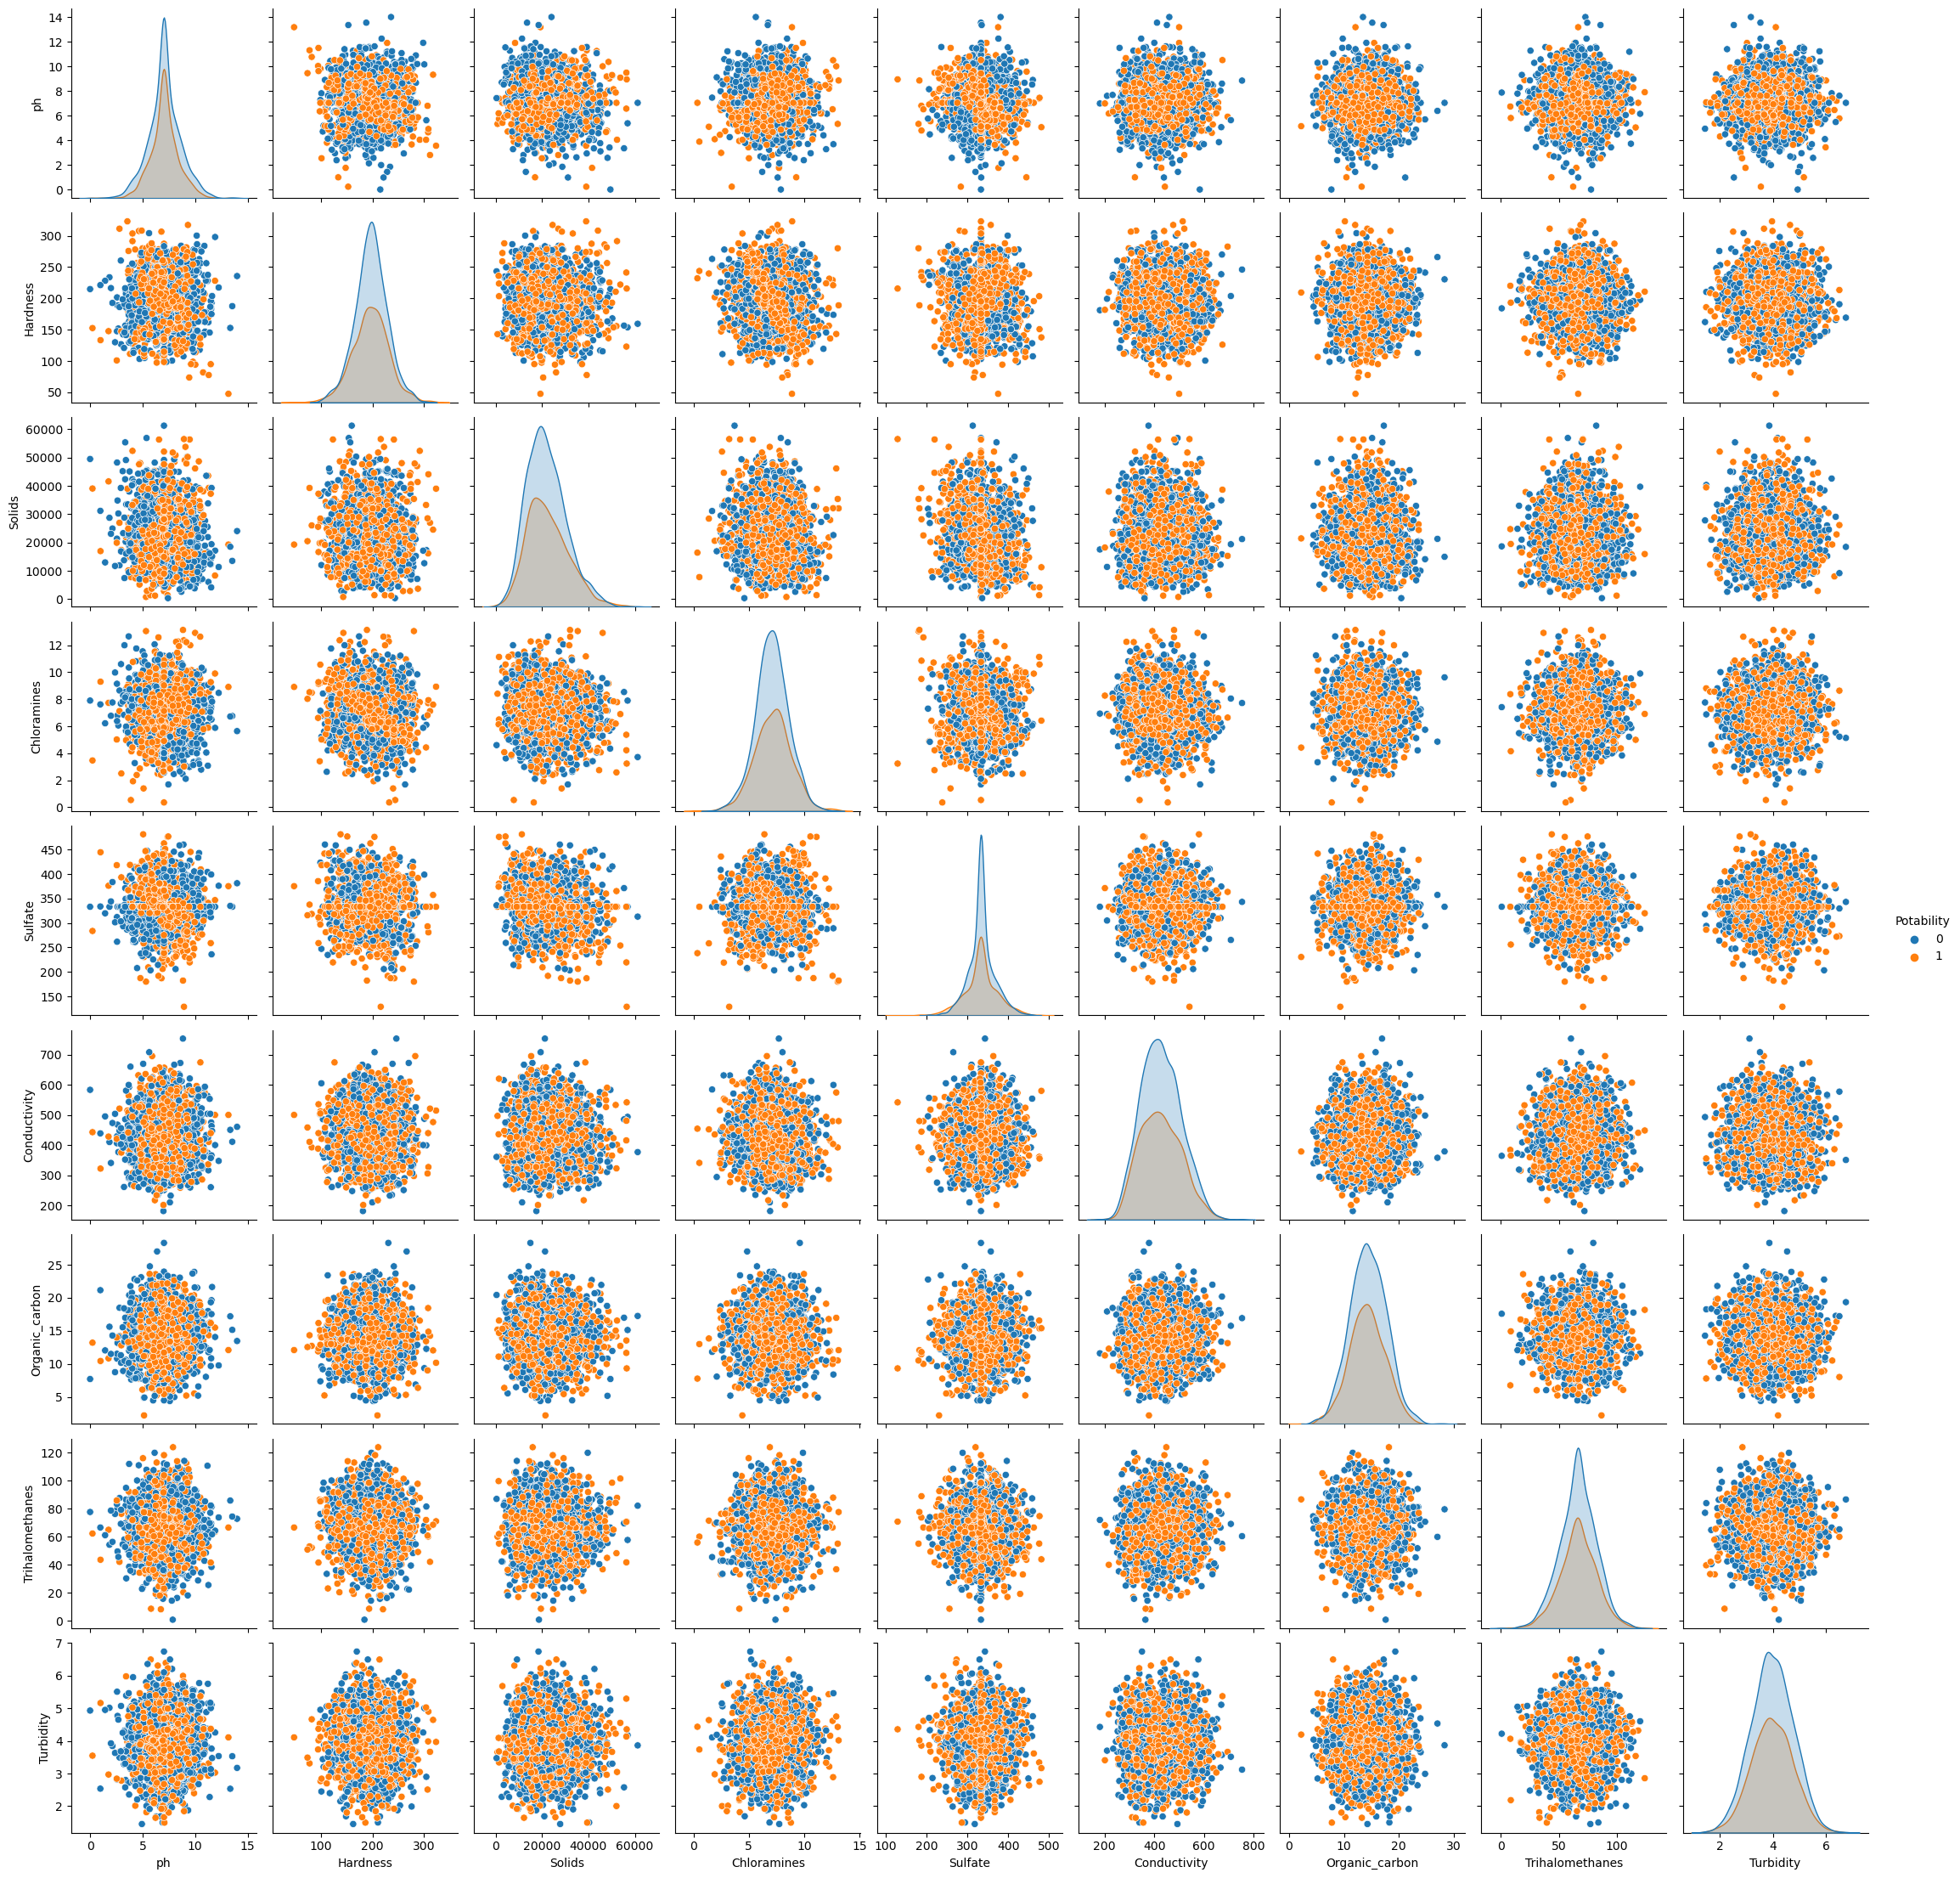

In [17]:
# Pairplot to visualize relationships between features
selected_features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
sns.pairplot(df[selected_features + ['Potability']], hue='Potability')

In [18]:
df.ph.isna().sum()

0

<Axes: xlabel='Potability'>

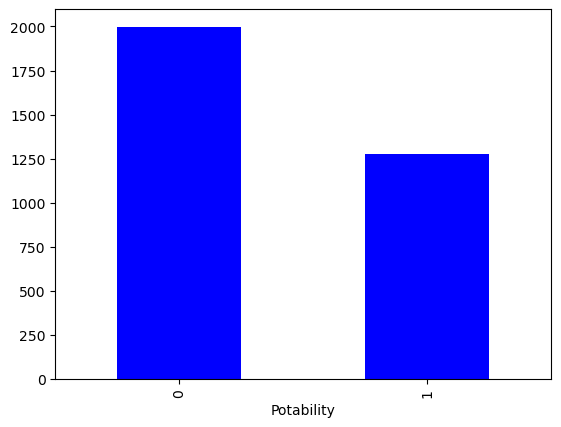

In [19]:
df['Potability'].value_counts().plot.bar(color='blue')

In [20]:
df['ph'].value_counts()

ph
7.036752    492
6.704432      1
5.915807      1
8.136498      1
6.493764      1
           ... 
4.187491      1
7.808012      1
5.895949      1
7.269652      1
7.874671      1
Name: count, Length: 2785, dtype: int64

In [21]:
# Function to categorize pH values into intervals

def ph_intervals(value):
    if 0 <= value < 4:
        return '0 - 4'
    elif 4 <= value < 7:
        return '4 - 7'
    elif 7 <= value < 8:
        return '7 - 8'
    elif 8 <= value < 10:
        return '8 - 10'
    else:
        return '11 - 14+'

In [22]:
df['ph_interval'] = df['ph'].apply(ph_intervals)

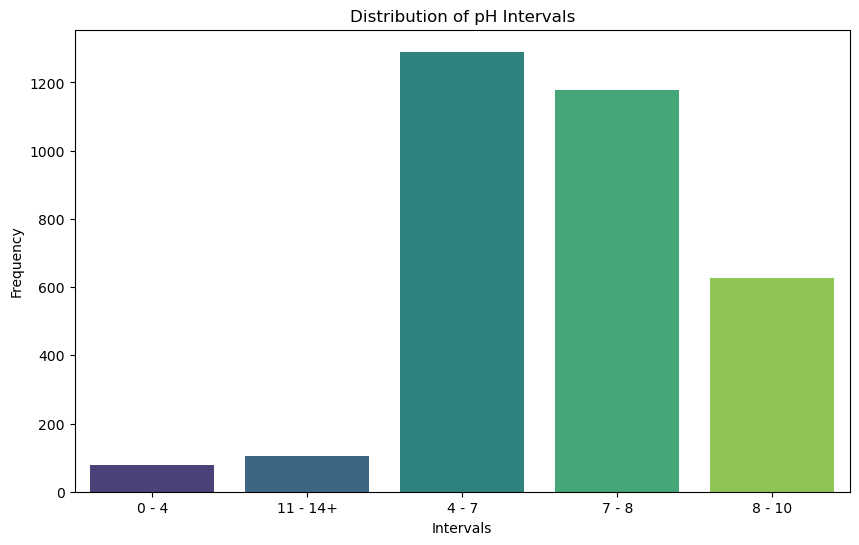

In [23]:
interval_counts = df['ph_interval'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=interval_counts.index, y=interval_counts.values, palette='viridis')

plt.title('Distribution of pH Intervals')
plt.xlabel('Intervals')
plt.ylabel('Frequency')
plt.show()

In [28]:
df_ph_greater_7 = df[df['ph'] > 7]
df_ph_less_7 = df[df['ph'] < 7]

In [29]:
df_ph_greater_7.shape

(1908, 11)

In [30]:
df_ph_less_7.shape

(1368, 11)

In [31]:
interval_counts_greater_7 = df_ph_greater_7['ph_interval'].value_counts()
interval_counts_less_7 = df_ph_less_7['ph_interval'].value_counts()

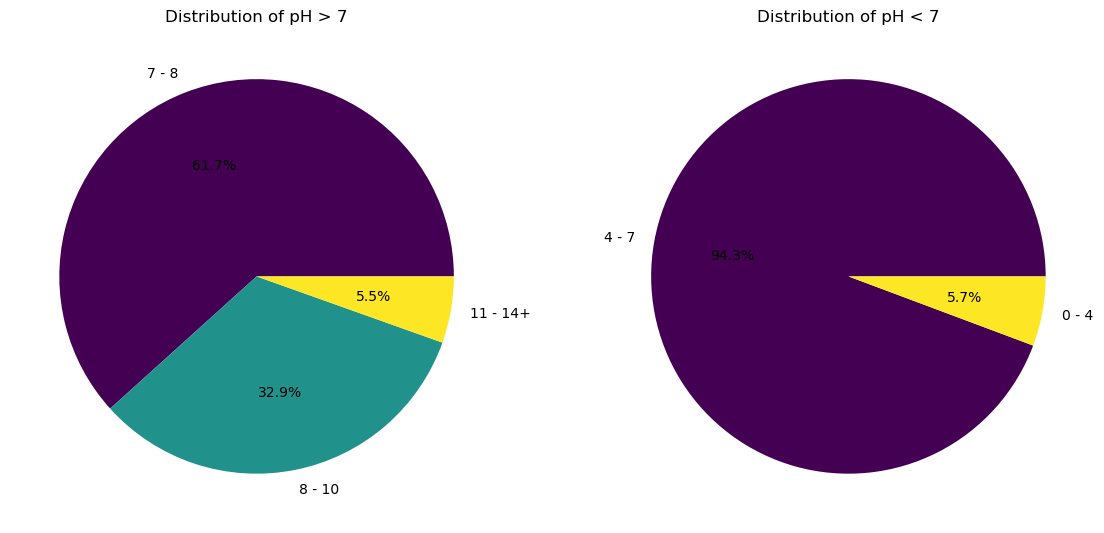

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for pH > 7
axs[0].pie(interval_counts_greater_7, labels=interval_counts_greater_7.index, autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(interval_counts_greater_7))))
axs[0].set_title('Distribution of pH > 7')

# Pie chart for pH < 7
axs[1].pie(interval_counts_less_7, labels=interval_counts_less_7.index, autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(interval_counts_less_7))))
axs[1].set_title('Distribution of pH < 7')

plt.show()

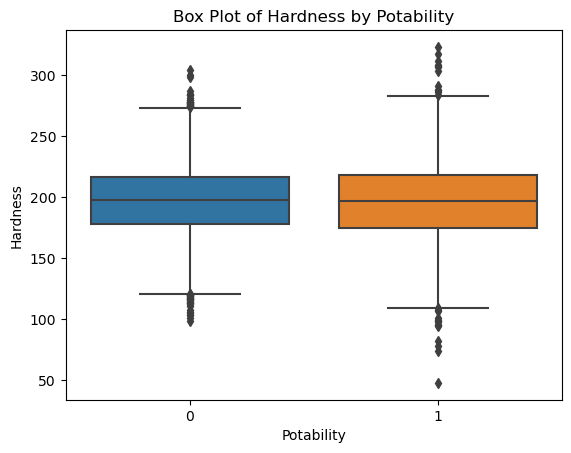

In [33]:
sns.boxplot(data=df, x='Potability', y='Hardness')
plt.title('Box Plot of Hardness by Potability')
plt.show()

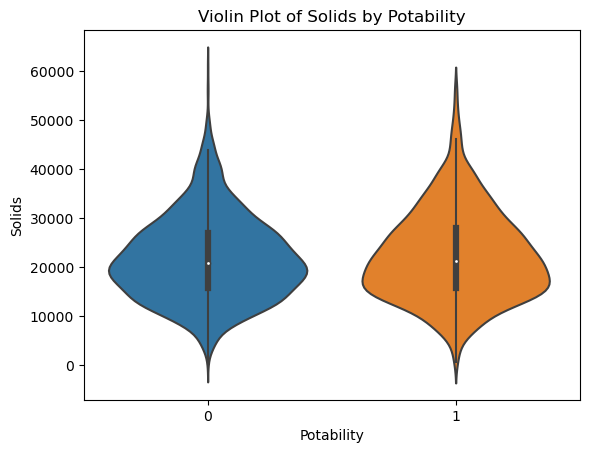

In [34]:
sns.violinplot(data=df, x='Potability', y='Solids')
plt.title('Violin Plot of Solids by Potability')
plt.show()

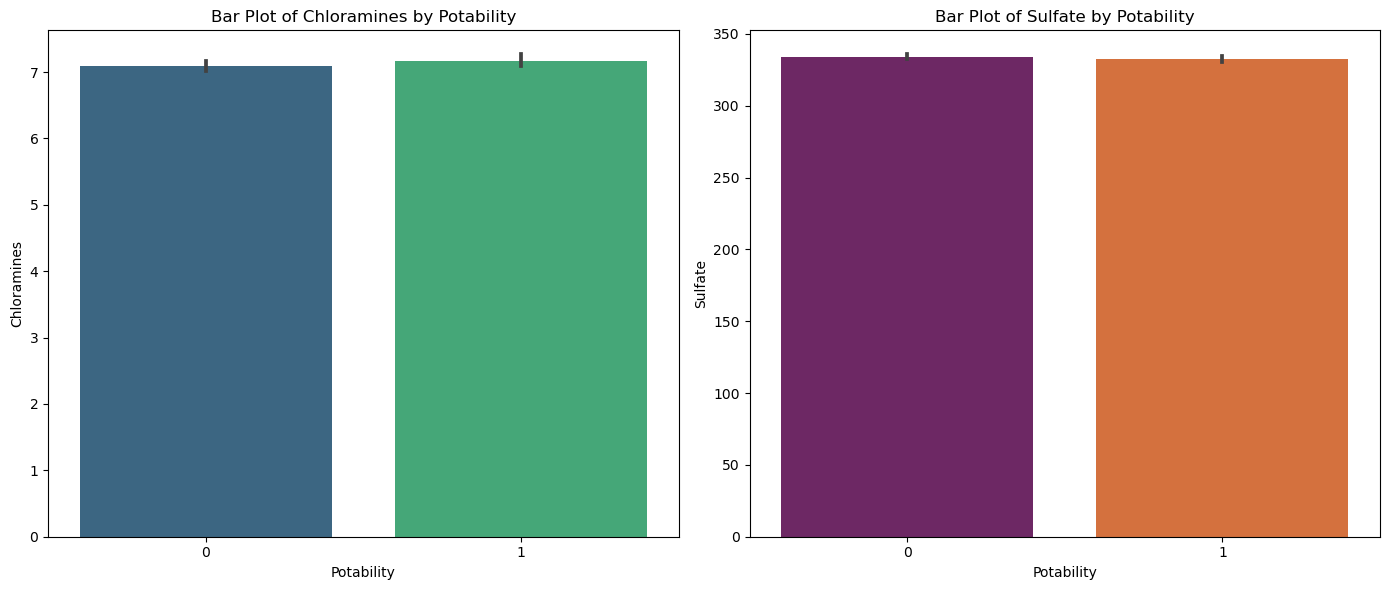

In [35]:
# Create horizontal subplots for bar plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot of Chloramines by Potability
sns.barplot(data=df, x='Potability', y='Chloramines', ax=axs[0], palette="viridis")
axs[0].set_title('Bar Plot of Chloramines by Potability')
axs[0].set_xlabel('Potability')
axs[0].set_ylabel('Chloramines')

# Bar plot of Sulfate by Potability
sns.barplot(data=df, x='Potability', y='Sulfate', ax=axs[1], palette="inferno")
axs[1].set_title('Bar Plot of Sulfate by Potability')
axs[1].set_xlabel('Potability')
axs[1].set_ylabel('Sulfate')

# Display the plots
plt.tight_layout()
plt.show()

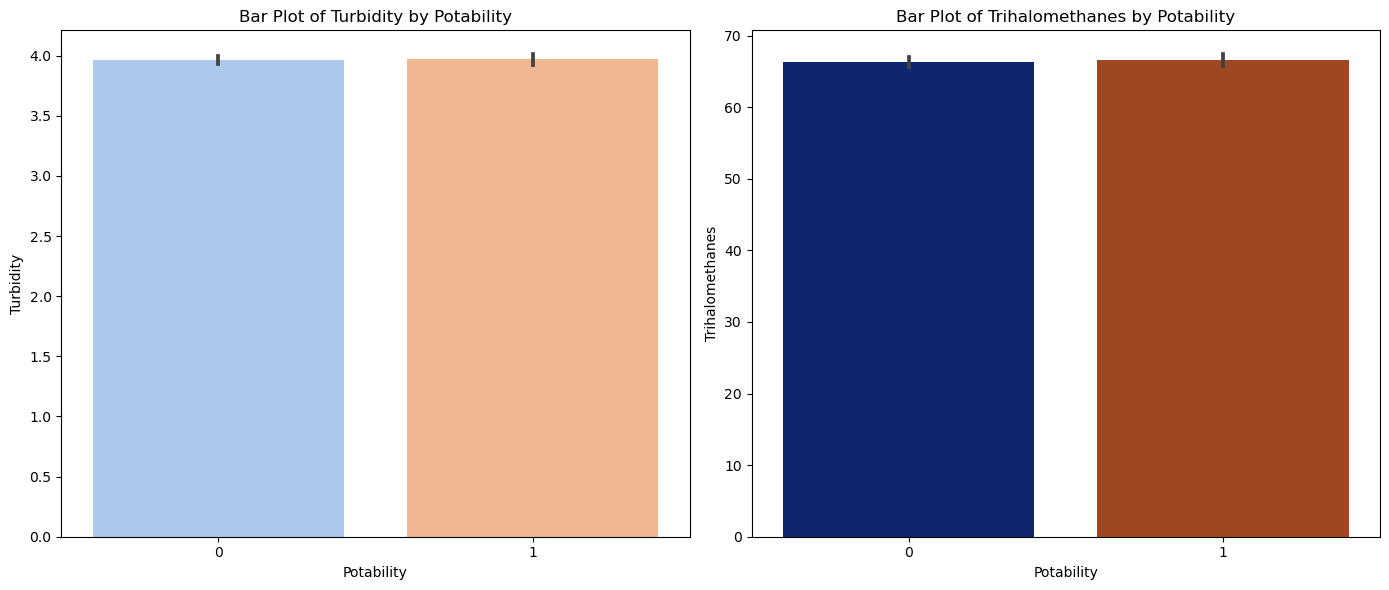

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=df, x='Potability', y='Turbidity', ax=axs[0], palette="pastel")
axs[0].set_title('Bar Plot of Turbidity by Potability')
axs[0].set_xlabel('Potability')
axs[0].set_ylabel('Turbidity')

sns.barplot(data=df, x='Potability', y='Trihalomethanes', ax=axs[1], palette="dark")
axs[1].set_title('Bar Plot of Trihalomethanes by Potability')
axs[1].set_xlabel('Potability')
axs[1].set_ylabel('Trihalomethanes')

plt.tight_layout()
plt.show()

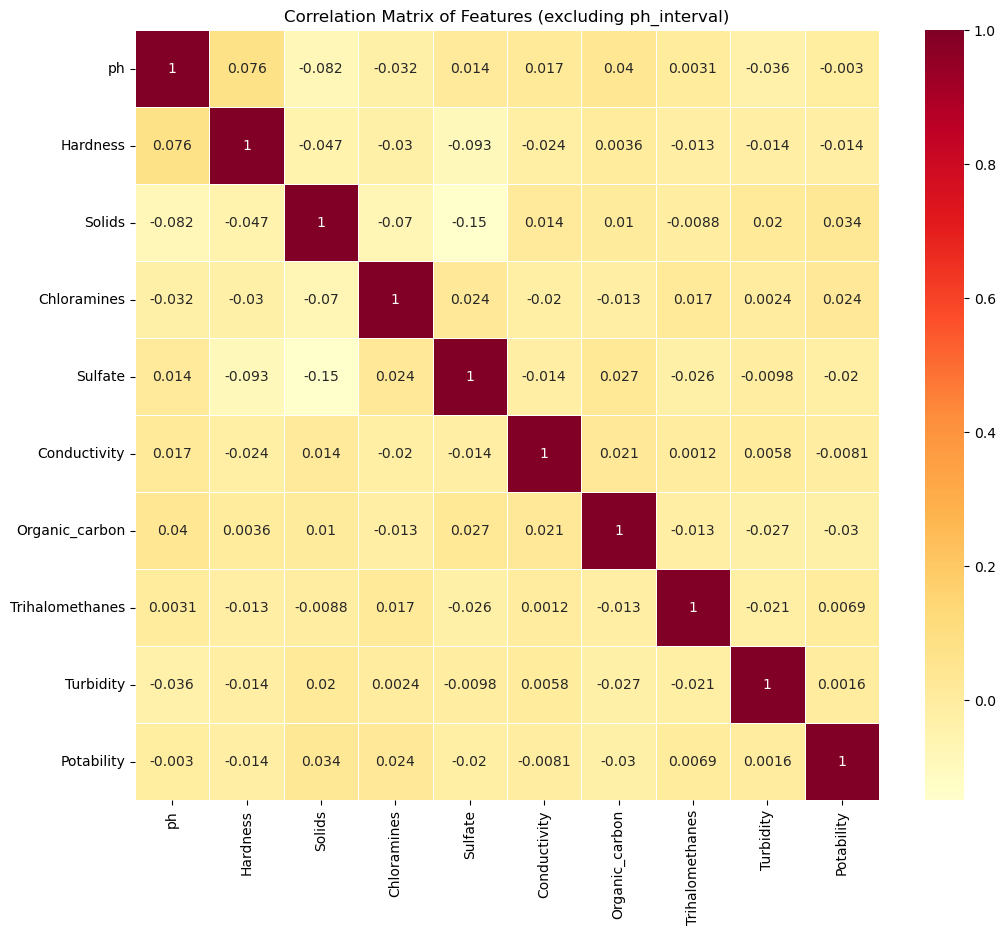

In [37]:
# Select only numerical columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Drop the 'ph_interval' column if it exists in the correlation matrix
if 'ph_interval' in corr.columns:
    corr = corr.drop('ph_interval', axis=0).drop('ph_interval', axis=1)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="YlOrRd", linewidths=0.5, linecolor='white', cbar=True)
plt.title("Correlation Matrix of Features (excluding ph_interval)")
plt.show()